To decode the message sent to watson from sherlock, I played around with different image processing methods.

firstly, converting the image from RGB2GRAY helps me find the first piece of the puzzle

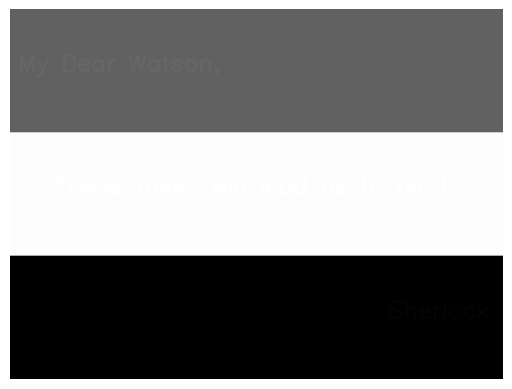

In [4]:
import cv2
import matplotlib.pyplot as plt

# Load an RGB image from a file
image = cv2.imread('for_watson.png')

if image is not None:
    # Convert the RGB image to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Display the grayscale image using matplotlib
    plt.imshow(grayscale_image, cmap='gray')
    plt.axis('off')  # Turn off axis labels
    plt.show()
else:
    print('Image not found or could not be loaded.')

To figure out the second piece of the puzzle, I converted the image from RGB2HSV
then I set my HSV upper and lower threshold values using a custom built GUI.I did a bitwise_and masking and
stoped when I found a suitable threshold values that displayed the second piece of the puzzle

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets


def threshold_hsv(hue_low, hue_high, saturation_low, saturation_high, value_low, value_high):
    # Convert the BGR image to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create masks for each channel based on the threshold values
    hue_mask = cv2.inRange(hsv_image, (hue_low, saturation_low, value_low), (hue_high, saturation_high, value_high))

    # Apply the masks to the original image
    thresholded_image = cv2.bitwise_and(image, image, mask=hue_mask)

    # Display the thresholded image using matplotlib
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(thresholded_image, cv2.COLOR_BGR2RGB))
    plt.title('Thresholded Image (HSV)')
    plt.axis('off')
    plt.show()

# Define the interactive sliders for threshold values
interact(threshold_hsv,
         hue_low=widgets.IntSlider(min=0, max=180, step=1, value=0, description='Hue Low'),
         hue_high=widgets.IntSlider(min=0, max=180, step=1, value=30, description='Hue High'),
         saturation_low=widgets.IntSlider(min=0, max=255, step=1, value=50, description='Saturation Low'),
         saturation_high=widgets.IntSlider(min=0, max=255, step=1, value=255, description='Saturation High'),
         value_low=widgets.IntSlider(min=0, max=255, step=1, value=50, description='Value Low'),
         value_high=widgets.IntSlider(min=0, max=255, step=1, value=255, description='Value High'))


interactive(children=(IntSlider(value=0, description='Hue Low', max=180), IntSlider(value=30, description='Hue…

<function __main__.threshold_hsv(hue_low, hue_high, saturation_low, saturation_high, value_low, value_high)>

I just played around with the different color channels of the image and
I was able to get the third piece of the puzzle

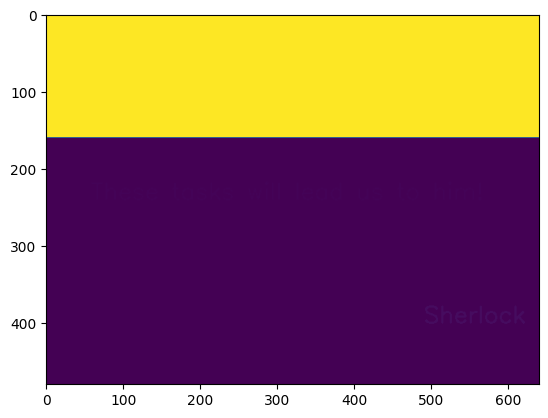

In [6]:
plt.imshow(image[:,:,0])